## Imports

In [ ]:
import re
import pandas as pd
from pandas import DataFrame as DataFrame
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import plotly.express as px
import numpy as np

# Two Datasets

# 1.FN4A 

## Prepare Data

### Load Dataset from drive

In [ ]:
url = 'https://raw.githubusercontent.com/berserkhmdvhb/Data-Wrangling/main/Files/FN4A.txt'
url2 = 'https://raw.githubusercontent.com/berserkhmdvhb/Data-Wrangling/main/Files/FN4T.txt'

from urllib.request import urlopen
data = urlopen(url).read().decode('utf-8')

In [ ]:
data[0:3000]

'\r\nUDS= 0 to 25 in 0.1 step\r\nUGS= 15 to 27 in 4 step\r\nNO. UDS ID UGS\r\n V A V\r\n1 0 -4.22731E-09 15\r\n2 0.1 -1.29189E-09 15\r\n3 0.2 1.23651E-09 15\r\n4 0.3 3.80388E-09 15\r\n5 0.4 6.11898E-09 15\r\n6 0.5 8.2786E-09 15\r\n7 0.6 1.03676E-08 15\r\n8 0.7 1.23828E-08 15\r\n9 0.8 1.43698E-08 15\r\n10 0.9 1.63046E-08 15\r\n11 1 1.82505E-08 15\r\n12 1.1 2.01758E-08 15\r\n13 1.2 2.2055E-08 15\r\n14 1.3 2.39331E-08 15\r\n15 1.4 2.57927E-08 15\r\n16 1.5 2.75898E-08 15\r\n17 1.6 2.94016E-08 15\r\n18 1.7 3.11808E-08 15\r\n19 1.8 3.29074E-08 15\r\n20 1.9 3.46396E-08 15\r\n21 2 3.63446E-08 15\r\n22 2.1 3.79875E-08 15\r\n23 2.2 3.9637E-08 15\r\n24 2.3 4.12578E-08 15\r\n25 2.4 4.28257E-08 15\r\n26 2.5 4.43937E-08 15\r\n27 2.6 4.59347E-08 15\r\n28 2.7 4.74409E-08 15\r\n29 2.8 4.89012E-08 15\r\n30 2.9 5.03654E-08 15\r\n31 3 5.17913E-08 15\r\n32 3.1 5.31659E-08 15\r\n33 3.2 5.45424E-08 15\r\n34 3.3 5.58948E-08 15\r\n35 3.4 5.71931E-08 15\r\n36 3.5 5.84839E-08 15\r\n37 3.6 5.9752E-08 15\r\n38 3.7

### Separate information and form groups

In [ ]:
##substitue 'E' with 'e' so that python understand the floating number
data =re.sub('E','e',data)


##create a pattern for selecting desired columns and group them 
pattern = """
([\d.]*)
(\ )
(?P<Current>[.\d-]*[$e][-\d]*)
(\ )
(?P<Voltage>\d{1,2})
"""

List = []
for item in re.finditer(pattern,data,re.VERBOSE):
    List.append(item.groupdict())

In [ ]:
data[0:500]

'\r\nUDS= 0 to 25 in 0.1 step\r\nUGS= 15 to 27 in 4 step\r\nNO. UDS ID UGS\r\n V A V\r\n1 0 -4.22731e-09 15\r\n2 0.1 -1.29189e-09 15\r\n3 0.2 1.23651e-09 15\r\n4 0.3 3.80388e-09 15\r\n5 0.4 6.11898e-09 15\r\n6 0.5 8.2786e-09 15\r\n7 0.6 1.03676e-08 15\r\n8 0.7 1.23828e-08 15\r\n9 0.8 1.43698e-08 15\r\n10 0.9 1.63046e-08 15\r\n11 1 1.82505e-08 15\r\n12 1.1 2.01758e-08 15\r\n13 1.2 2.2055e-08 15\r\n14 1.3 2.39331e-08 15\r\n15 1.4 2.57927e-08 15\r\n16 1.5 2.75898e-08 15\r\n17 1.6 2.94016e-08 15\r\n18 1.7 3.11808e-08 15\r\n19 1.8 3.29074e-08 15\r'

In [ ]:
List[0:10]

[{'Current': '-4.22731e-09', 'Voltage': '15'},
 {'Current': '-1.29189e-09', 'Voltage': '15'},
 {'Current': '1.23651e-09', 'Voltage': '15'},
 {'Current': '3.80388e-09', 'Voltage': '15'},
 {'Current': '6.11898e-09', 'Voltage': '15'},
 {'Current': '8.2786e-09', 'Voltage': '15'},
 {'Current': '1.03676e-08', 'Voltage': '15'},
 {'Current': '1.23828e-08', 'Voltage': '15'},
 {'Current': '1.43698e-08', 'Voltage': '15'},
 {'Current': '1.63046e-08', 'Voltage': '15'}]

### Create DataFrame from Groups (which are separated by regex pattern)

In [ ]:
DF = DataFrame.from_dict(List)
DF

,Current,Voltage
0,-4.22731e-09,15
1,-1.29189e-09,15
2,1.23651e-09,15
3,3.80388e-09,15
4,6.11898e-09,15
...,...,...
999,8.98299e-07,27
1000,8.98604e-07,27
1001,8.98869e-07,27
1002,8.99082e-07,27


In [ ]:
columns_titles = ["Voltage","Current"]
DF = DF.reindex(columns=columns_titles)
DF

,Voltage,Current
0,15,-4.22731e-09
1,15,-1.29189e-09
2,15,1.23651e-09
3,15,3.80388e-09
4,15,6.11898e-09
...,...,...
999,27,8.98299e-07
1000,27,8.98604e-07
1001,27,8.98869e-07
1002,27,8.99082e-07


In [ ]:
DF.Voltage.unique()

array(['15', '19', '23', '27'], dtype=object)

In [ ]:
#format = lambda x: int(x)
#DF.Voltage.apply(format)
DF.Voltage = pd.to_numeric(DF.Voltage)
DF.Current = pd.to_numeric(DF.Current)


In [ ]:
DF.head()

,Voltage,Current
0,15,-4.227310e-09
1,15,-1.291890e-09
2,15,1.236510e-09
3,15,3.803880e-09
4,15,6.118980e-09


In [ ]:
type(DF['Voltage'][0])

numpy.int64

### Export DataFrame to a CSV file

In [ ]:
DF.to_csv('FN4A-wrangled.csv', index = False)

### Categorize data by Voltage Groups

In [ ]:
#DF = DF.reset_index()
#DF.head()

In [ ]:
DF.loc[0].Voltage == 15

True

In [ ]:
dict = {v: [] for v in DF.Voltage.unique()}
for v in dict.keys():
  for i in range(DF.shape[0]):
    if DF.loc[i].Voltage == v:
      dict[v].append(DF.loc[i].Current)


In [ ]:
dict.keys()

dict_keys([15, 19, 23, 27])

In [ ]:
DFF = DataFrame(dict)
DFF

,15,19,23,27
0,-4.227310e-09,-9.885000e-09,-1.011650e-08,-1.095520e-08
1,-1.291890e-09,-2.216470e-09,1.408700e-10,2.216810e-09
2,1.236510e-09,3.791010e-09,8.507300e-09,1.335940e-08
3,3.803880e-09,8.560700e-09,1.573700e-08,2.335770e-08
4,6.118980e-09,1.287950e-08,2.275880e-08,3.312260e-08
...,...,...,...,...
246,1.107530e-07,2.734340e-07,5.332590e-07,8.982990e-07
247,1.108530e-07,2.735470e-07,5.334110e-07,8.986040e-07
248,1.109660e-07,2.736540e-07,5.335270e-07,8.988690e-07
249,1.110710e-07,2.737400e-07,5.336950e-07,8.990820e-07


In [ ]:
idx = np.linspace(-70, 70,141)
print(idx)
print(len(idx))

[-70. -69. -68. -67. -66. -65. -64. -63. -62. -61. -60. -59. -58. -57.
 -56. -55. -54. -53. -52. -51. -50. -49. -48. -47. -46. -45. -44. -43.
 -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31. -30. -29.
 -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17. -16. -15.
 -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.
   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.]
141


## Visualization

### Scatter Plot

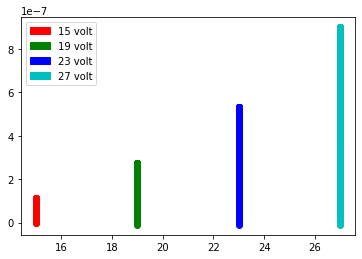

In [ ]:

colors = list("rgbc")

i = 0
for key in dict:
  cr = colors[i]
  for val in dict[key]:
    plt.scatter(key,val,color=cr)
  i+=1  
r = mpatches.Patch(color='r', label='15 volt')
g = mpatches.Patch(color='g', label='19 volt')
b = mpatches.Patch(color='b', label='23 volt')
c = mpatches.Patch(color='c', label='27 volt')

plt.legend(handles=[r,g,b,c])
plt.show()

In [ ]:
list(dict.keys())

[15, 19, 23, 27]

### Line Chart

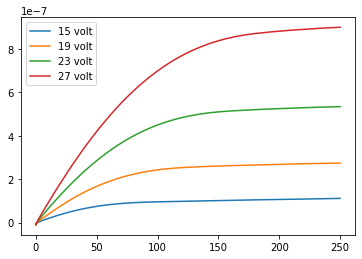

In [ ]:
#V = list(dict.keys())
x = np.linspace(-30,30,num=61)
for key in dict.keys():
  plt.plot(dict[key], label = '%s volt' % key)
plt.legend()
plt.show()

### Interactive Line Chart

In [ ]:
DFF = DFF.reset_index()

In [ ]:
list(DFF.columns)[1:]

[15, 19, 23, 27]

In [ ]:
DFP=pd.melt(DFF , id_vars=['index'], value_vars=list(DFF.columns)[1:])

fig = px.line(DFP, x='index', y='value', color='variable')
fig.show()

### Histogram

Text(0, 0.5, 'Frequency')

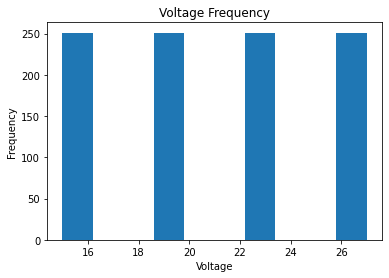

In [ ]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(DF['Voltage'])
# set title and labels
ax.set_title('Voltage Frequency')
ax.set_xlabel('Voltage')
ax.set_ylabel('Frequency')

# 2.FN4T
Doing the same tasks for the 2nd dataset

## Perpare Data

### Separate and create DataFrame

In [ ]:
data = urlopen(url2).read().decode('utf-8')
data =re.sub('E','e',data)
pattern = """
([\d.]*)
(\ )
(?P<Current>[.\d-]*[$e][-\d]*)
(\ )
(?P<Voltage>[.\d-]*)
"""
List2 = []
for item in re.finditer(pattern,data,re.VERBOSE):
    List2.append(item.groupdict())
DF2 = DataFrame.from_dict(List2)  
DF2 

,Current,Voltage
0,4.99707e-08,-30
1,4.29938e-08,-29.8
2,3.93023e-08,-29.6
3,3.68301e-08,-29.4
4,3.45966e-08,-29.2
...,...,...
1199,7.37914e-07,29.2
1200,7.57123e-07,29.4
1201,7.7685e-07,29.6
1202,7.9673e-07,29.8


In [ ]:
columns_titles = ["Voltage","Current"]
DF2 = DF2.reindex(columns=columns_titles)
DF2 = DF2.applymap(format)
DF2.Voltage = pd.to_numeric(DF2.Voltage)
DF2.Current = pd.to_numeric(DF2.Current)
DF2

,Voltage,Current
0,-30.0,4.997070e-08
1,-29.8,4.299380e-08
2,-29.6,3.930230e-08
3,-29.4,3.683010e-08
4,-29.2,3.459660e-08
...,...,...
1199,29.2,7.379140e-07
1200,29.4,7.571230e-07
1201,29.6,7.768500e-07
1202,29.8,7.967300e-07


In [ ]:
DF2.to_csv('FN4T-wrangled.csv', index = False) 

### Categorize data by Voltage Groups

In [ ]:
np.sum(DF2['Voltage'] == -30)

4

In [ ]:
DF2

,Voltage,Current
0,-30.0,4.997070e-08
1,-29.8,4.299380e-08
2,-29.6,3.930230e-08
3,-29.4,3.683010e-08
4,-29.2,3.459660e-08
...,...,...
1199,29.2,7.379140e-07
1200,29.4,7.571230e-07
1201,29.6,7.768500e-07
1202,29.8,7.967300e-07


In [ ]:
DF2 = DF2.set_index('Voltage')
DF2 = DF2.sort_index()
DF2

,Current
Voltage,
-30.0,4.997070e-08
-30.0,5.751170e-07
-30.0,1.534450e-07
-30.0,7.390200e-07
-29.8,8.676690e-08
...,...
29.8,4.499830e-07
30.0,9.120860e-07
30.0,4.568060e-07


In [ ]:
DF2 = DF2.reset_index()
DF2

,Voltage,Current
0,-30.0,4.997070e-08
1,-30.0,5.751170e-07
2,-30.0,1.534450e-07
3,-30.0,7.390200e-07
4,-29.8,8.676690e-08
...,...,...
1199,29.8,4.499830e-07
1200,30.0,9.120860e-07
1201,30.0,4.568060e-07
1202,30.0,9.533690e-07


In [ ]:
DF2.tail(50)

,Voltage,Current
1154,27.6,7.133140e-07
1155,27.6,5.949260e-07
1156,27.8,7.319560e-07
1157,27.8,6.117680e-07
1158,27.8,3.845790e-07
1159,27.8,7.345510e-07
1160,28.0,7.499070e-07
1161,28.0,7.506540e-07
1162,28.0,6.287710e-07
1163,28.0,3.909380e-07


In [ ]:
DF2.Voltage[0] == DF2.Voltage[1] == DF2.Voltage[2] == DF2.Voltage[3]

True

In [ ]:
for i in range(0,10,4):
  print(i)

0
4
8


In [ ]:
##Enusring that data are ordered by 4 consequtive groups
flag = 1
for i in range(0,DF2.shape[0],4):
  if DF2.Voltage[i] != DF2.Voltage[i+1] or DF2.Voltage[i] != DF2.Voltage[i+2] or DF2.Voltage[i] != DF2.Voltage[i+3]:
    flag = 0
flag

1

In [ ]:
dic={}
dic[DF2.Voltage[0]] = 1
dic

{-30.0: 1}

In [ ]:
#dictt = {}
#V = ['Volt1', 'Volt2', 'Volt3', 'Volt4']
#dictt = {v: [] for v in V}
#for v in dictt.keys():
#for i in range(0,DF2.shape[0],4):
  #if DF2.loc[i].Voltage == v:
  #dictt[DF2.Voltage[i]] = [DF2.Current[i],DF2.Current[i+1], DF2.Current[i+2], DF2.Current[i+3]] 
#  dictt['Volt1'].append(DF2.Current[i])
#  dictt['Volt2'].append(DF2.Current[i+1])
#  dictt['Volt3'].append(DF2.Current[i+2])
#  dictt['Volt4'].append(DF2.Current[i+3])


In [ ]:
dictt = {}
V = ['Volt1', 'Volt2', 'Volt3', 'Volt4']
dictt = {v: [] for v in V}
#for v in dictt.keys():
L = []
for i in range(0,DF2.shape[0],4):
  #if DF2.loc[i].Voltage == v:
  #dictt[DF2.Voltage[i]] = [DF2.Current[i],DF2.Current[i+1], DF2.Current[i+2], DF2.Current[i+3]] 
  L = sorted([DF2.Current[i],DF2.Current[i+1],DF2.Current[i+2],DF2.Current[i+3]])
  dictt['Volt1'].append(L[0])
  dictt['Volt2'].append(L[1])
  dictt['Volt3'].append(L[2])
  dictt['Volt4'].append(L[3])


In [ ]:
dictt.keys()

dict_keys(['Volt1', 'Volt2', 'Volt3', 'Volt4'])

In [ ]:
L = dictt['Volt1']
L[0:7]

[4.99707e-08,
 4.2993800000000003e-08,
 3.9302300000000006e-08,
 3.68301e-08,
 3.45966e-08,
 3.27255e-08,
 3.1107499999999996e-08]

In [ ]:
len(dictt['Volt1'])

301

In [ ]:
len(dictt['Volt1']) == len(dictt['Volt1']) == len(dictt['Volt3']) == len(dictt['Volt4'])

True

In [ ]:
DFF2 = DataFrame(dictt)
DFF2

,Volt1,Volt2,Volt3,Volt4
0,4.997070e-08,1.534450e-07,5.751170e-07,7.390200e-07
1,4.299380e-08,8.676690e-08,1.394520e-07,1.449170e-07
2,3.930230e-08,7.442700e-08,1.022480e-07,1.289070e-07
3,3.683010e-08,6.622130e-08,9.012150e-08,1.226520e-07
4,3.459660e-08,6.043110e-08,8.624760e-08,1.175350e-07
...,...,...,...,...
296,4.299820e-07,7.379140e-07,8.457420e-07,8.691130e-07
297,4.366010e-07,7.571230e-07,8.620390e-07,8.896120e-07
298,4.432930e-07,7.768500e-07,8.786710e-07,9.106780e-07
299,4.499830e-07,7.967300e-07,8.952400e-07,9.318130e-07


In [ ]:
DFF2 = DFF2.reset_index()
idx = np.linspace(-30,30,num=301)
idx

array([-30. , -29.8, -29.6, -29.4, -29.2, -29. , -28.8, -28.6, -28.4,
       -28.2, -28. , -27.8, -27.6, -27.4, -27.2, -27. , -26.8, -26.6,
       -26.4, -26.2, -26. , -25.8, -25.6, -25.4, -25.2, -25. , -24.8,
       -24.6, -24.4, -24.2, -24. , -23.8, -23.6, -23.4, -23.2, -23. ,
       -22.8, -22.6, -22.4, -22.2, -22. , -21.8, -21.6, -21.4, -21.2,
       -21. , -20.8, -20.6, -20.4, -20.2, -20. , -19.8, -19.6, -19.4,
       -19.2, -19. , -18.8, -18.6, -18.4, -18.2, -18. , -17.8, -17.6,
       -17.4, -17.2, -17. , -16.8, -16.6, -16.4, -16.2, -16. , -15.8,
       -15.6, -15.4, -15.2, -15. , -14.8, -14.6, -14.4, -14.2, -14. ,
       -13.8, -13.6, -13.4, -13.2, -13. , -12.8, -12.6, -12.4, -12.2,
       -12. , -11.8, -11.6, -11.4, -11.2, -11. , -10.8, -10.6, -10.4,
       -10.2, -10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,
        -8.4,  -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,
        -6.6,  -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,
        -4.8,  -4.6,

In [ ]:
DFF2['index'] = idx
DFF2 = DFF2.set_index('index')
DFF2

,Volt1,Volt2,Volt3,Volt4
index,,,,
-30.0,4.997070e-08,1.534450e-07,5.751170e-07,7.390200e-07
-29.8,4.299380e-08,8.676690e-08,1.394520e-07,1.449170e-07
-29.6,3.930230e-08,7.442700e-08,1.022480e-07,1.289070e-07
-29.4,3.683010e-08,6.622130e-08,9.012150e-08,1.226520e-07
-29.2,3.459660e-08,6.043110e-08,8.624760e-08,1.175350e-07
...,...,...,...,...
29.2,4.299820e-07,7.379140e-07,8.457420e-07,8.691130e-07
29.4,4.366010e-07,7.571230e-07,8.620390e-07,8.896120e-07
29.6,4.432930e-07,7.768500e-07,8.786710e-07,9.106780e-07


## Visualization

### Line Chart

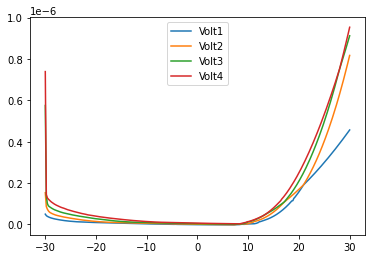

In [ ]:
for key in dictt.keys():
  plt.plot(idx,dictt[key], label = '%s' % key)
plt.legend()
plt.show()

### Interactive Line Chart

In [ ]:
DFF2 = DFF2.reset_index()

In [ ]:
list(DFF2.columns)[1:]

['Volt1', 'Volt2', 'Volt3', 'Volt4']

In [ ]:
DFP=pd.melt(DFF2 , id_vars=['index'], value_vars=list(DFF2.columns)[1:])
fig = px.line(DFP, x='index', y='value', color='variable')
fig.show()

In [ ]:
DFP

,index,variable,value
0,-30.0,Volt1,4.997070e-08
1,-29.8,Volt1,4.299380e-08
2,-29.6,Volt1,3.930230e-08
3,-29.4,Volt1,3.683010e-08
4,-29.2,Volt1,3.459660e-08
...,...,...,...
1199,29.2,Volt4,8.691130e-07
1200,29.4,Volt4,8.896120e-07
1201,29.6,Volt4,9.106780e-07
1202,29.8,Volt4,9.318130e-07


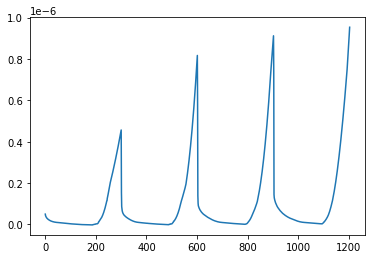

In [ ]:
plt.plot(DFP['value'])